In [3]:
%pip install seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [4]:
df=pd.read_csv("Wholesale customers data_clustering.csv")

In [5]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [7]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [8]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

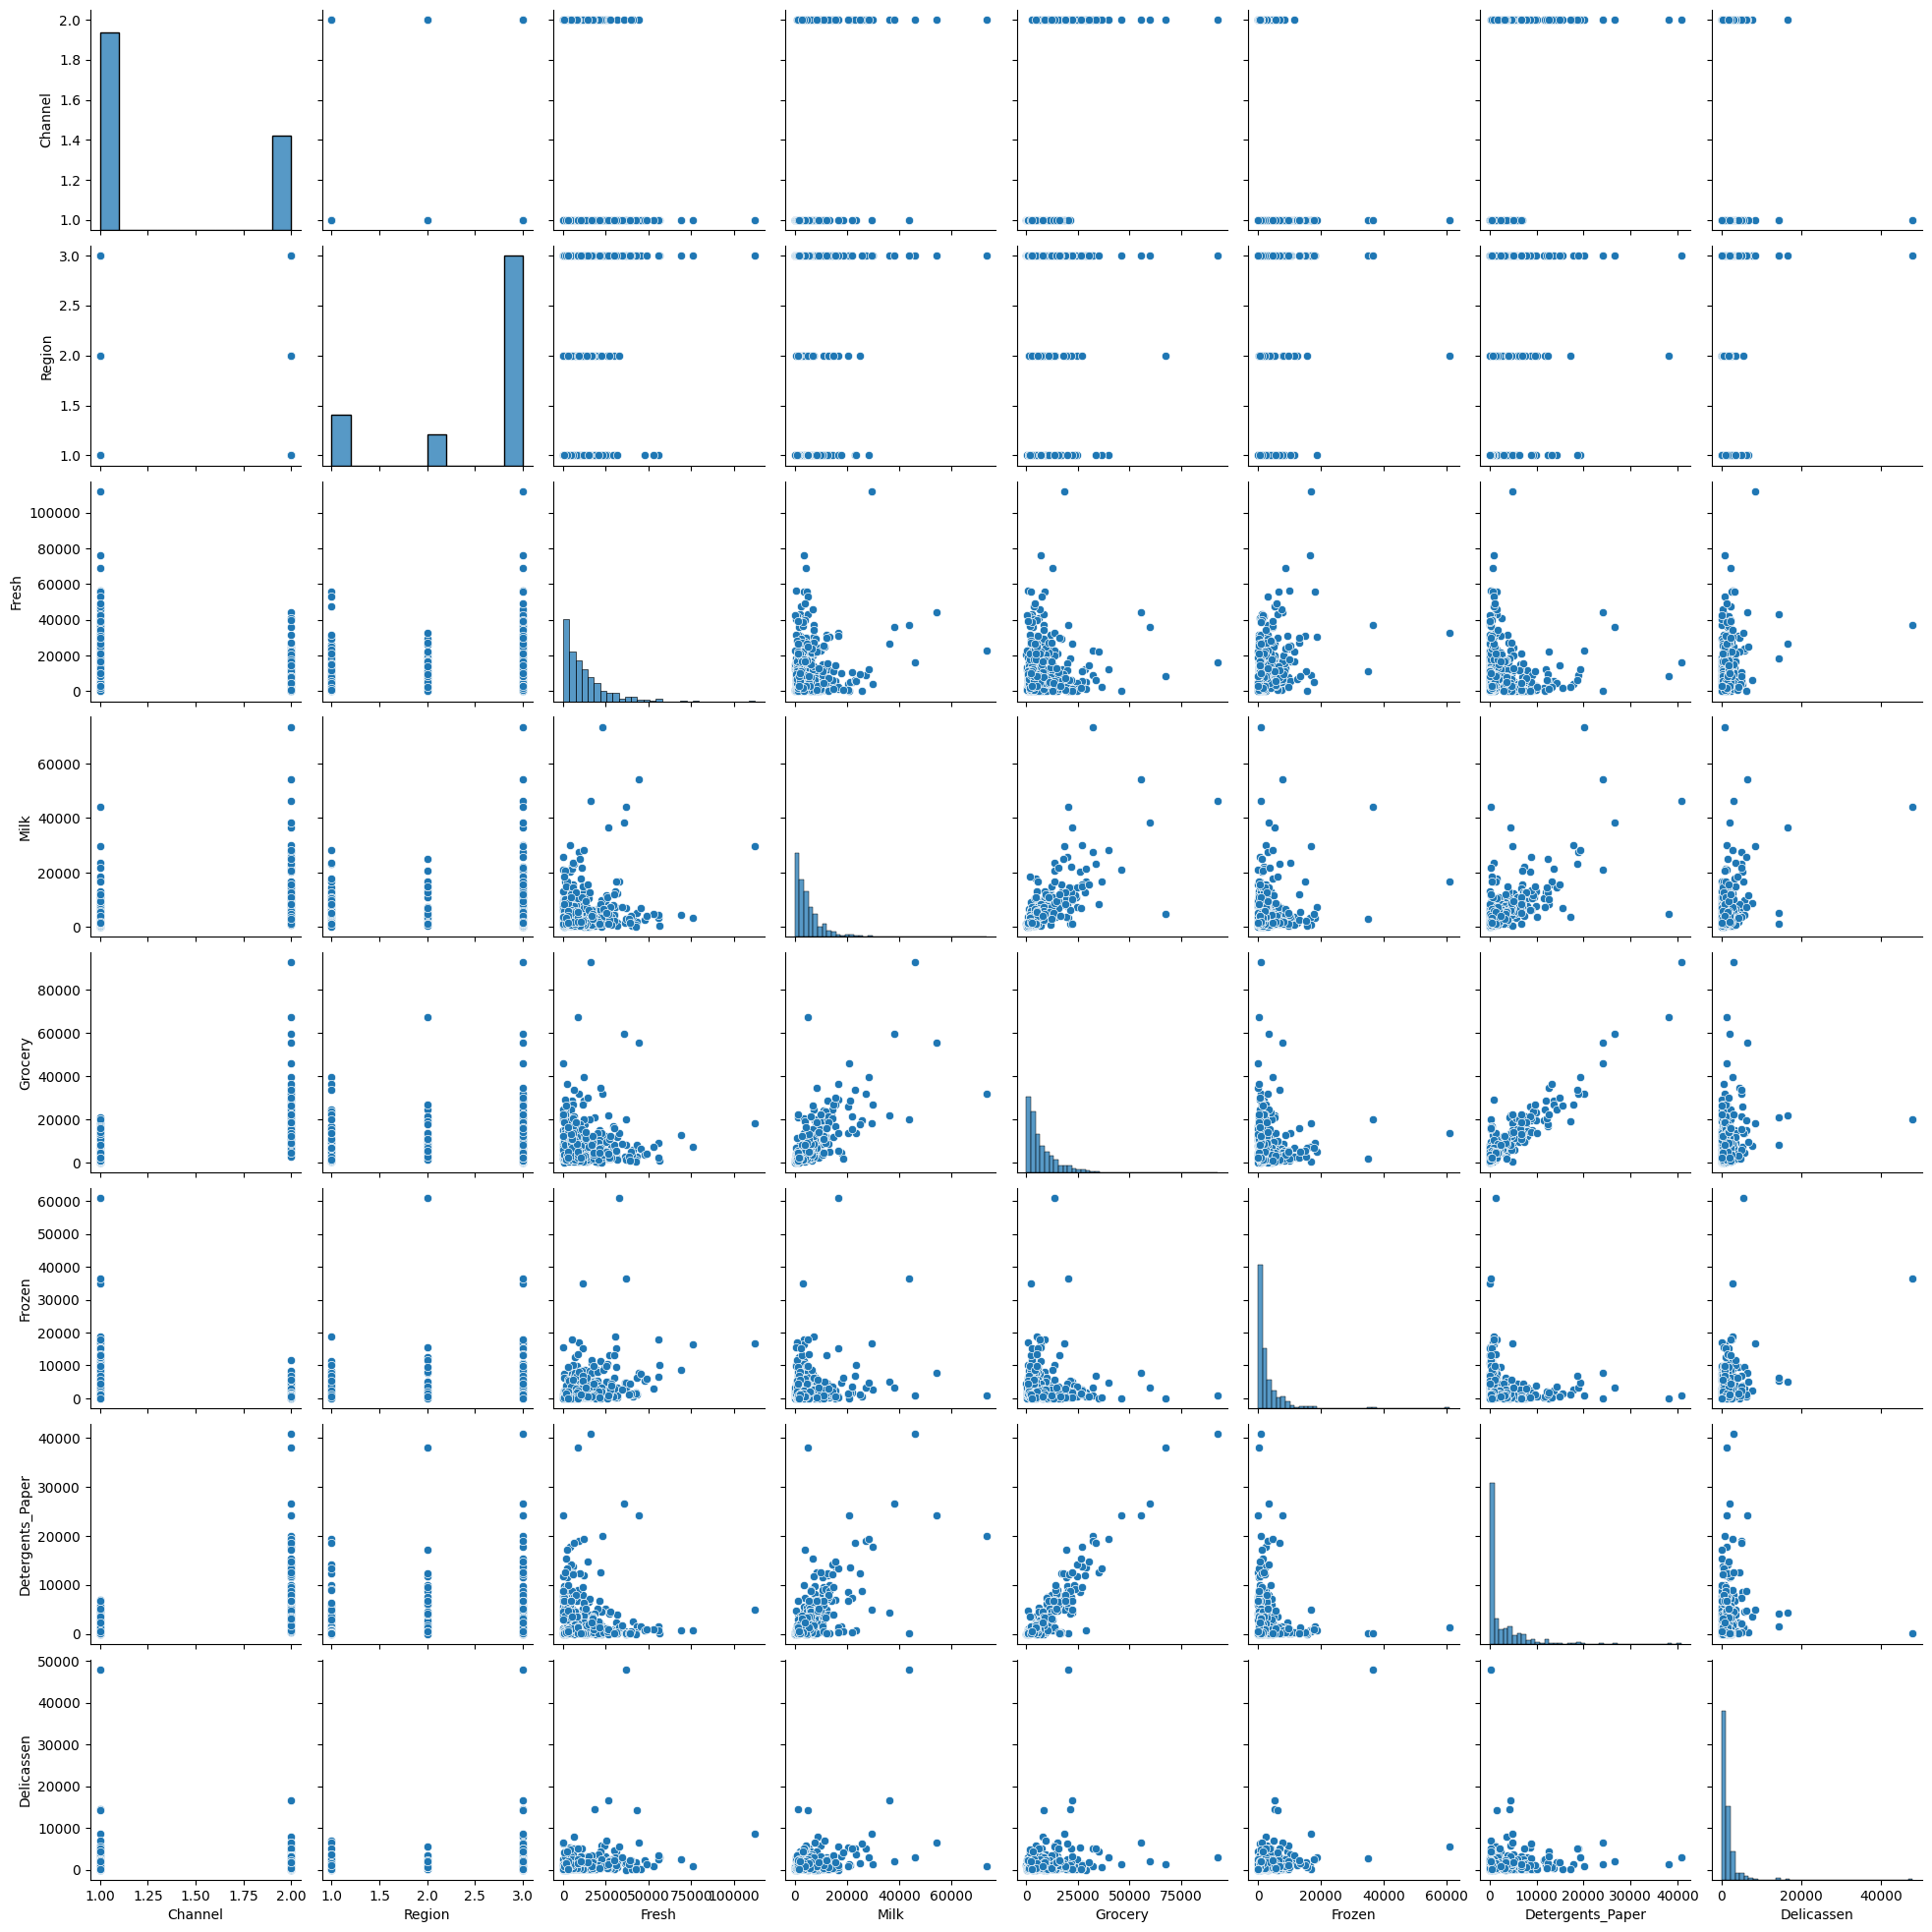

In [9]:
sns.pairplot(df)

In [11]:
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

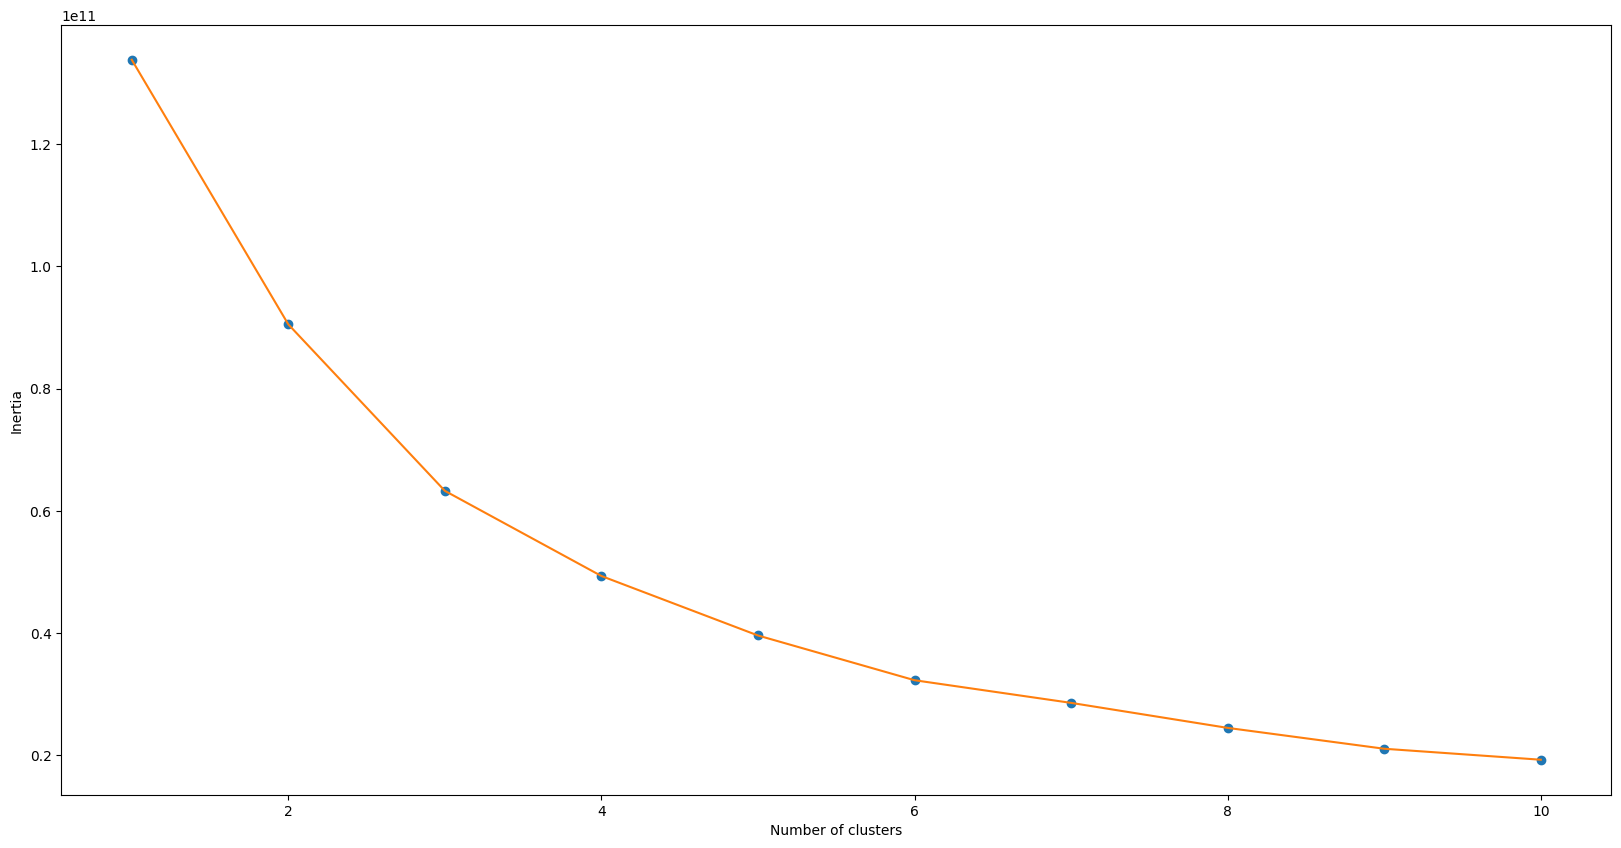

In [12]:
from sklearn.cluster import KMeans
X=df.loc[:,['Fresh', 'Milk', 'Grocery']].values
inertia=[]
for n in range(1,11):
    model=KMeans(n_clusters=n,init='k-means++',max_iter=500,random_state=42)
    model.fit(X)
    inertia.append(model.inertia_)
plt.figure(figsize=(20,10))
plt.plot(range(1,11),inertia,'o')
plt.plot(range(1,11),inertia,'-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [13]:
model=KMeans(n_clusters=4,init='k-means++',max_iter=500,random_state=42)
model.fit(X)
labels=model.labels_
df['cluster']=labels
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,0
4,2,3,22615,5410,7198,3915,1777,5185,1


In [16]:

import plotly.express as px

In [20]:
fig = px.scatter_3d(df,
                     x='Fresh',
                     y='Milk',
                     z='Grocery', 
                     color='cluster',
                     hover_data=["Fresh", 
                                 "Milk", 
                                 "Grocery"],
                     category_orders={"cluster": range(0, 4)})

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show(renderer="browser")

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Channel_encoded'] = le.fit_transform(df['Channel'])
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster,Channel_encoded
0,2,3,12669,9656,7561,214,2674,1338,0,1
1,2,3,7057,9810,9568,1762,3293,1776,0,1
2,2,3,6353,8808,7684,2405,3516,7844,0,1
3,1,3,13265,1196,4221,6404,507,1788,0,0
4,2,3,22615,5410,7198,3915,1777,5185,1,1


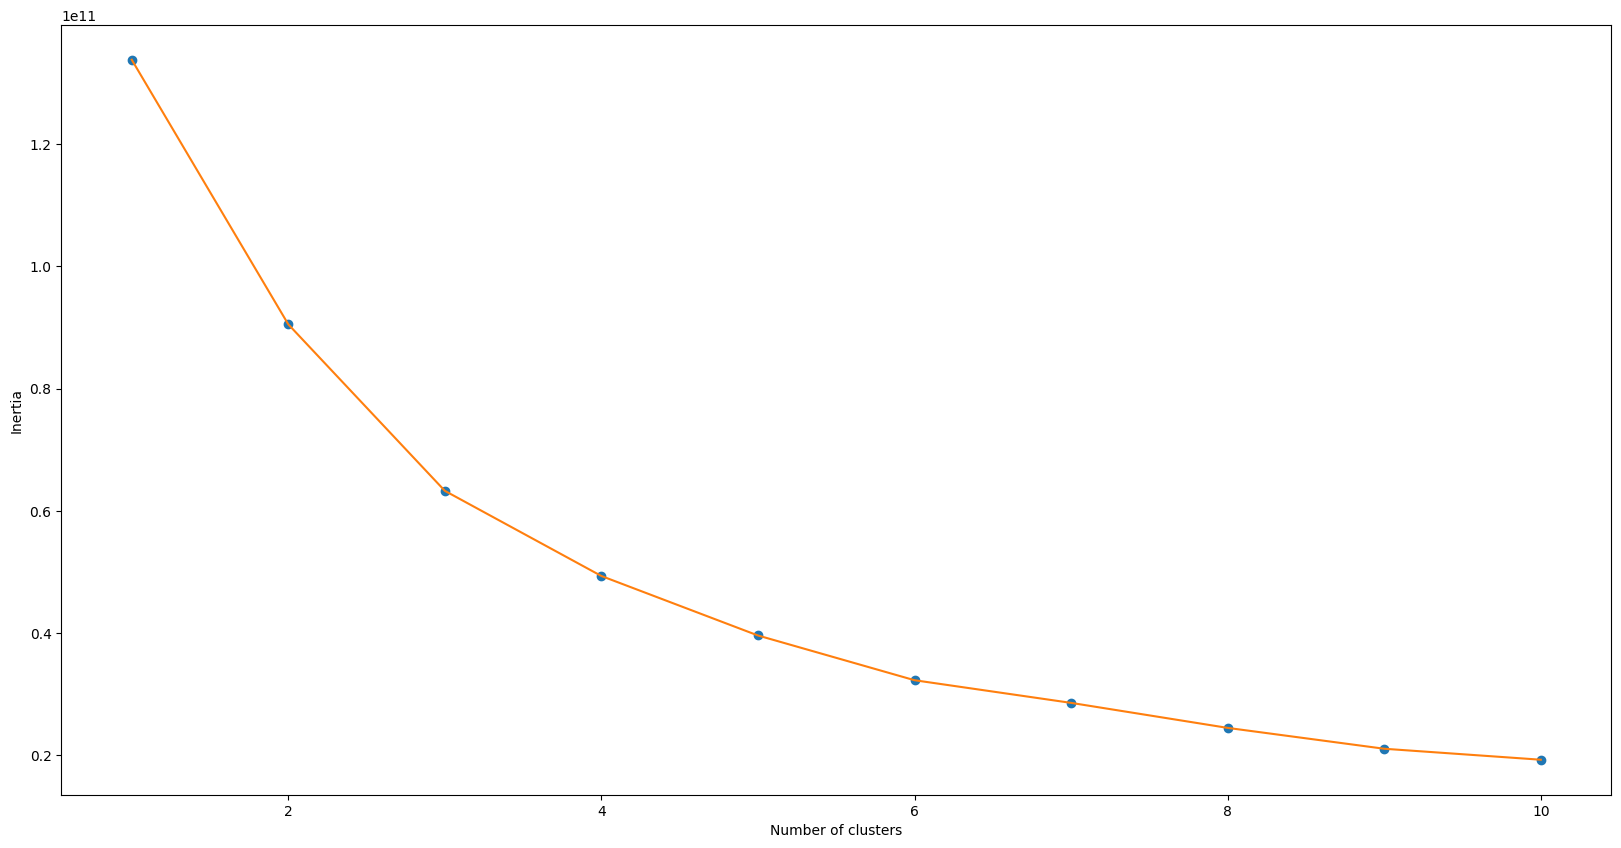

In [26]:
from sklearn.cluster import KMeans
X=df.loc[:,['Channel_encoded','Fresh','Milk','Grocery']].values
inertia=[]
for n in range(1,11):
    model=KMeans(n_clusters=n,init='k-means++',max_iter=500,random_state=42)
    model.fit(X)
    inertia.append(model.inertia_)
plt.figure(figsize=(20,10))
plt.plot(range(1,11),inertia,'o')
plt.plot(range(1,11),inertia,'-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

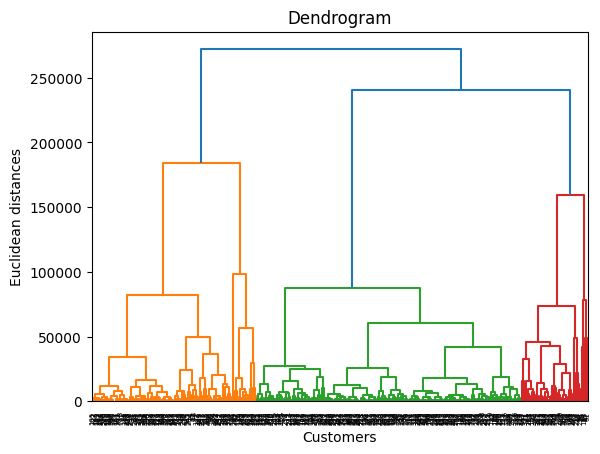

In [27]:
import scipy.cluster.hierarchy as sc
dendrogram = sc.dendrogram(sc.linkage(X, method = "ward"))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean distances")
plt.show()

In [28]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=5,metric='euclidean',linkage='ward')
y_hca=hc.fit_predict(X)

In [29]:
y_hca

array([2, 2, 2, 1, 1, 2, 2, 2, 2, 4, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2,
       1, 3, 1, 1, 2, 1, 4, 0, 1, 2, 1, 1, 2, 2, 1, 4, 4, 0, 1, 1, 4, 4,
       2, 4, 4, 3, 2, 4, 2, 2, 0, 2, 1, 2, 4, 2, 1, 2, 2, 3, 2, 4, 2, 4,
       2, 1, 2, 2, 1, 4, 2, 1, 2, 1, 2, 4, 2, 2, 2, 2, 2, 1, 2, 3, 3, 0,
       2, 1, 1, 1, 4, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 2, 4, 2, 4,
       1, 4, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 0, 1, 1, 2, 0, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 4, 2, 2, 2, 1, 1, 2, 1, 2,
       2, 4, 2, 1, 2, 2, 2, 1, 1, 4, 2, 4, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2,
       0, 2, 2, 2, 2, 0, 2, 3, 2, 2, 2, 2, 2, 2, 1, 1, 2, 4, 2, 1, 1, 2,
       2, 2, 4, 4, 1, 2, 2, 4, 2, 2, 2, 4, 1, 4, 2, 2, 2, 2, 4, 1, 2, 2,
       1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 0, 1, 1,
       1, 2, 2, 2, 2, 1, 1, 2, 2, 4, 2, 1, 2, 1, 2, 2, 0, 0, 2, 2, 1, 2,
       2, 4, 4, 1, 4, 1, 2, 2, 2, 0, 2, 2, 1, 2, 1, 1, 2, 2, 0, 1, 0, 0,
       2, 1, 1, 0, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1,

In [30]:
df["cluster_hca"]=y_hca

In [31]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster,Channel_encoded,cluster_hca
0,2,3,12669,9656,7561,214,2674,1338,0,1,2
1,2,3,7057,9810,9568,1762,3293,1776,0,1,2
2,2,3,6353,8808,7684,2405,3516,7844,0,1,2
3,1,3,13265,1196,4221,6404,507,1788,0,0,1
4,2,3,22615,5410,7198,3915,1777,5185,1,1,1


In [32]:
df["cluster_hca"].unique()

array([2, 1, 4, 3, 0])

In [33]:
df["cluster_hca"].value_counts()

cluster_hca
2    235
1    125
4     53
0     21
3      6
Name: count, dtype: int64

In [35]:
fig = px.scatter_3d(df,
                     x='Fresh',
                     y='Milk',
                     z='Grocery', 
                     color='cluster_hca',
                     hover_data=["Fresh", 
                                 "Milk", 
                                 "Grocery"],
                     category_orders={"cluster_hca": range(0, 5)})

# fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

In [36]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=14,min_samples=4)
model=dbscan.fit(X)

In [37]:
model

,eps,14
,min_samples,4
,metric,'euclidean'
,metric_params,None
,algorithm,'auto'
,leaf_size,30
,p,None
,n_jobs,None


In [38]:
labels=model.labels_
labels

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

In [39]:
list(set(labels))

[np.int64(-1)]

In [41]:
from sklearn import metrics
sample_core=np.zeros_like(labels,dtype=bool)
sample_core

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [42]:
sample_core[model.core_sample_indices_]=True
sample_core

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [43]:
n_clusters=len(set(labels))-(1 if -1 in labels else 0)
n_clusters

0

In [45]:
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
if n_clusters > 1:
	print(metrics.silhouette_score(X, labels))
else:
	print("Silhouette score cannot be computed: less than 2 clusters found.")


Silhouette score cannot be computed: less than 2 clusters found.


In [46]:
df["cluster_dbscan"]=labels
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster,Channel_encoded,cluster_hca,cluster_dbscan
0,2,3,12669,9656,7561,214,2674,1338,0,1,2,-1
1,2,3,7057,9810,9568,1762,3293,1776,0,1,2,-1
2,2,3,6353,8808,7684,2405,3516,7844,0,1,2,-1
3,1,3,13265,1196,4221,6404,507,1788,0,0,1,-1
4,2,3,22615,5410,7198,3915,1777,5185,1,1,1,-1


In [47]:
sns.scatterplot(x = 'Annual Income (k$)', y='Spending Score (1-100)', hue='cluster_dbscan', data=df)

ValueError: Could not interpret value `Annual Income (k$)` for `x`. An entry with this name does not appear in `data`.

In [ ]:
#GMM
from sklearn.mixture import GaussianMixture
gmm=GaussianMixture(n_components=5,random_state=42)
gmm.fit(X)
gmm_labels=gmm.predict(X)
df['cluster_gmm']=gmm_labels
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster,Genter_encoded,cluster_hca,cluster_dbscan,cluster_gmm
0,1,Male,19,15,39,2,1,4,0,0
1,2,Male,21,15,81,2,1,3,0,2
2,3,Female,20,16,6,0,0,4,-1,0
3,4,Female,23,16,77,2,0,3,0,2
4,5,Female,31,17,40,0,0,4,0,0
